In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.shape

(1338, 7)

In [49]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [50]:
df.info()
#non null rows and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


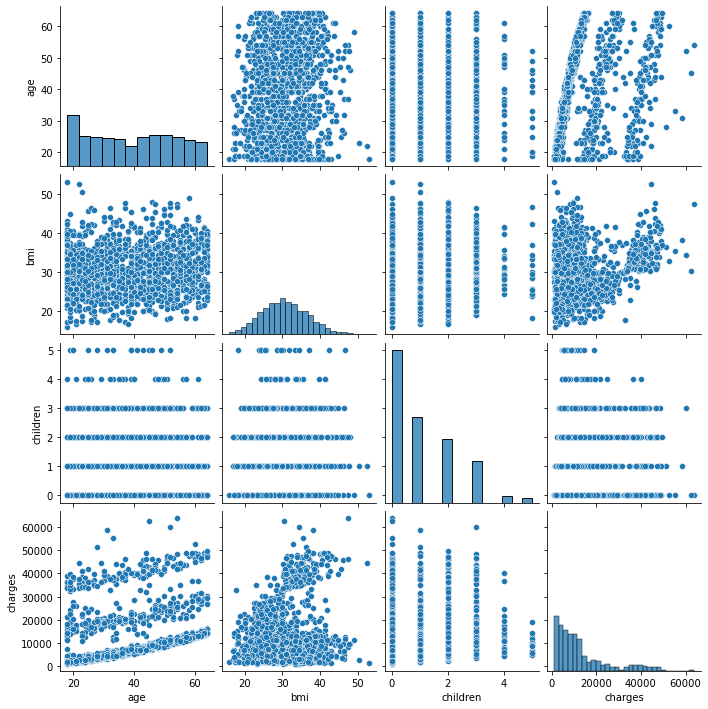

In [51]:
sns.pairplot(df)

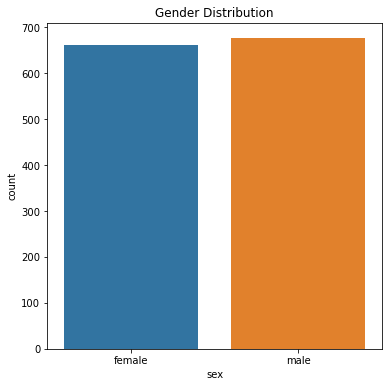

In [52]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()
#shows that there are almost equal number of males and females

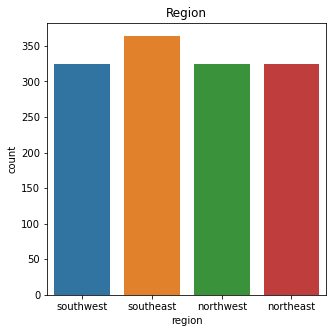

In [53]:
#region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

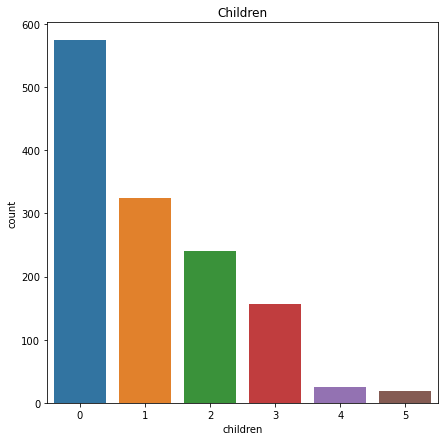

In [54]:
# children column
plt.figure(figsize=(7,7))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

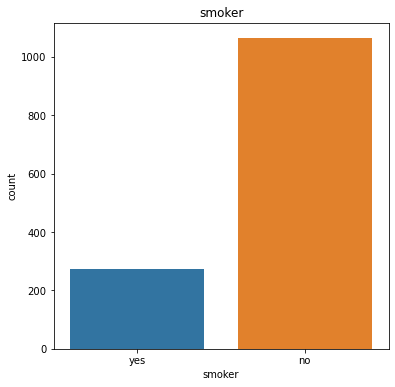

In [55]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

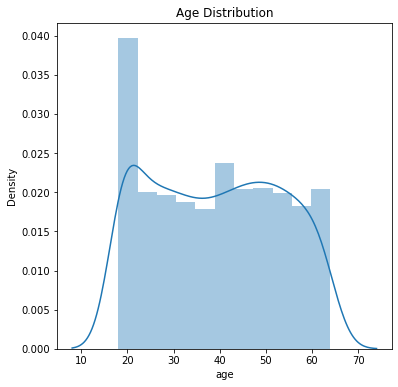

In [56]:
# distribution of age value
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

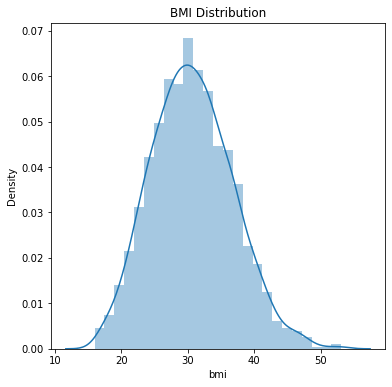

In [57]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

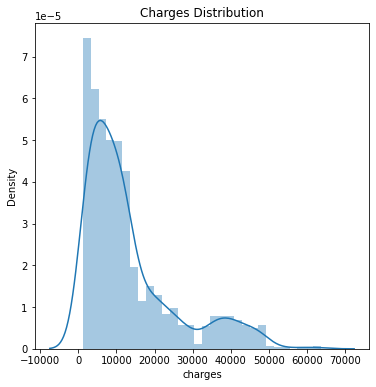

In [58]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Text(0.5, 1.0, 'Charges for smokers')

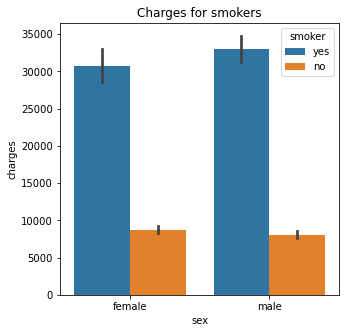

In [59]:
#charges vs sex,smoker
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<AxesSubplot:>

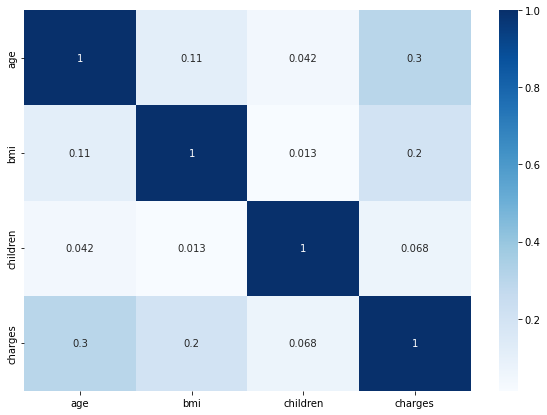

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [61]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
# encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
# encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [62]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [63]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
#creating two dataframes x and y
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']

In [65]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [66]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [68]:
lm = LinearRegression()

In [69]:
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
print(lm.coef_)

[   251.40512196     26.11715966    330.64637157    580.27438296
 -23928.10171061    212.22242728]


In [71]:
print(lm.intercept_)

11357.668742540935


In [72]:
pd.DataFrame(lm.coef_,X.columns,columns=["coef"])

,coef
age,251.405122
sex,26.117160
bmi,330.646372
children,580.274383
smoker,-23928.101711
region,212.222427


In [73]:
#creating predictions for x_test data to get predicted y_test values
predictions=lm.predict(X_test)

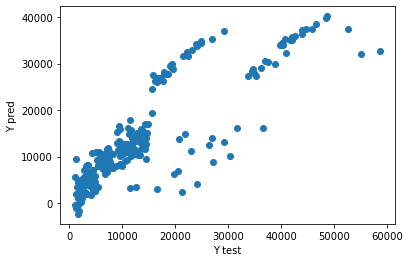

In [74]:
#compare y_test to predicted values using matplotlib
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()


In [75]:
#finding r2 
r2_test = metrics.r2_score(y_test,predictions)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684077


In [76]:
from sklearn import metrics
from math import sqrt
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4267.213826730733
MSE: 38337035.48643883
RMSE: 6191.690842285234


<AxesSubplot:xlabel='charges', ylabel='Density'>

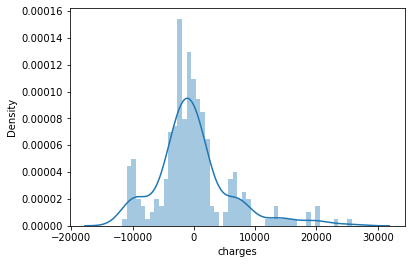

In [77]:
sns.distplot((y_test-predictions), bins = 50)

In [78]:
#predicting the charges
data = {'age':31, 'sex':1, 'bmi':25.74, 'children':0, 'smoker':1, 'region':0}
cust_df = pd.DataFrame(data,[0])
cust_df


,age,sex,bmi,children,smoker,region
0,31,1,25.74,0,1,0


In [79]:
cost_pred = lm.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred[0])

The medical insurance cost of the new customer is:  3760.080576496058


In [80]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    print(metrics.r2_score(y_test,pred),i)
    scores.append(metrics.r2_score(y_test,pred))
    

0.7907514220754801 0
0.7398460691975803 1
0.7661186068101189 2
0.7318630535235593 3
0.7152623490691622 4
0.7563099329119516 5
0.7712968118931958 6
0.7522952495699669 7
0.7590577437522752 8
0.751697750859326 9
0.7159887186891662 10
0.7663442397702628 11
0.6963527940045462 12
0.7675762645291008 13
0.7503260178999939 14
0.7861000790628434 15
0.7359470483980783 16
0.7358582476099484 17
0.7674746258945642 18
0.7418849395479234 19
0.7721389923279705 20
0.7350942248945385 21
0.7391646039683986 22
0.7319111168219183 23
0.766682269422279 24
0.731281592347887 25
0.7623217114326357 26
0.7610802539025239 27
0.7076421068830238 28
0.7164787401869037 29
0.7625465812979154 30
0.7003219917690312 31
0.7718364346323958 32
0.7611039644678691 33
0.7405969562237043 34
0.732287927260882 35
0.7337138724480929 36
0.7576315569056996 37
0.7025831616173855 38
0.7578913297836625 39
0.7165451496216209 40
0.6929236920803473 41
0.7694315077300078 42
0.7502637039220009 43
0.7706257911091132 44
0.7102372572893162 45
0.

0.759702112516115 375
0.7939037098986779 376
0.7548587393238441 377
0.7747187076096543 378
0.7333705636202922 379
0.7433471809486984 380
0.6983306459662011 381
0.763405811439418 382
0.7682645505055319 383
0.7601986423183862 384
0.6974303466013969 385
0.7219860082367406 386
0.7373985009062438 387
0.727951253283823 388
0.7431460925038615 389
0.7691772162811942 390
0.7268420957699311 391
0.7604933309033007 392
0.7127753787181192 393
0.7611412949569842 394
0.7382952873986013 395
0.7706991271858809 396
0.7776400085876503 397
0.747614197966792 398
0.7564533019470813 399
0.744551305299779 400
0.7612818060279135 401
0.7517750206233307 402
0.7215615732645668 403
0.7692961189494354 404
0.7401046958772624 405
0.7339921237883875 406
0.7480185534472727 407
0.7473329915546272 408
0.7407819060996425 409
0.7832613773034631 410
0.7489594658746819 411
0.7721430907674361 412
0.6996012379368811 413
0.7632305979205006 414
0.7508468999516191 415
0.7932268149078862 416
0.7766490936466174 417
0.75094260515063

0.7174547170835346 766
0.7022656043871333 767
0.7503529224054691 768
0.7625524805308631 769
0.7549401582894051 770
0.6989587137505747 771
0.7379549827776327 772
0.741078146234025 773
0.7374220513233348 774
0.7838023879267012 775
0.7129475187431313 776
0.7278219148208038 777
0.7438146091106951 778
0.7676188255612355 779
0.7477795553455946 780
0.7163127514453866 781
0.7422984712917522 782
0.774877459697722 783
0.7512009897592329 784
0.7451153276627858 785
0.7943604840287337 786
0.7377853464006721 787
0.7483682709719018 788
0.7239882364639737 789
0.7092597062919876 790
0.7720803670957732 791
0.7627607166086222 792
0.7503642889839011 793
0.7619385899257654 794
0.7657222256332881 795
0.7516149875598581 796
0.6772808358428352 797
0.7502302606590445 798
0.7074963056151935 799
0.738008720910273 800
0.7453981683376474 801
0.744647236573651 802
0.7500885738571256 803
0.7478407713591015 804
0.7565434468198333 805
0.7190275346431361 806
0.7771959067431746 807
0.730094969273546 808
0.77541940880092

In [81]:
#finding random state value which gives max r2 score
np.argmax(scores)


661

In [82]:
print('maximum r2 score ',scores[np.argmax(scores)])

maximum r2 score  0.8049762343933878


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=661)
model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [84]:
y_pred=model.predict(X_test)

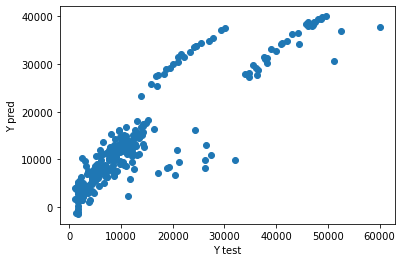

In [85]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()


In [86]:
import pickle
pickle.dump(model,open('insurance.pkl','wb'))

In [87]:
from sklearn import metrics
from math import sqrt
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 11986.754382007355
MSE: 273265152.762688
RMSE: 16530.733582109657
